In [1]:
import torch
import matplotlib.pyplot as plt
from RG import RGModel

## Learn from Data

In [2]:
mdl = RGModel([1], 1, hdims=[16, 8], hyper_dim=16)
opt = torch.optim.Adam(mdl.parameters(), lr=0.01)

In [3]:
x_dat = torch.tensor([-1.]*50+[1.]*50)
x_dat = x_dat + 0.1*torch.randn_like(x_dat)
x_dat = x_dat[:,None,None]
x_dat.shape

torch.Size([100, 1, 1])

In [17]:
mdl.train()
opt.param_groups[0]['lr'] = 0.001
for _ in range(10):
    opt.zero_grad()
    out = mdl.nll_loss(x_dat, lk=0.01, lg=0.01, atol=1e-3, rtol=1e-3)
    loss = out[0]
    loss.backward()
    opt.step()
    print(*[f'{o.item():5.2f}' for o in out])

 0.20  0.17  0.50  2.22
 0.06  0.03  0.49  2.37
 0.27  0.24  0.50  2.09
 0.01 -0.02  0.53  2.54
 0.08  0.05  0.56  2.74
-0.16 -0.21  0.61  3.49
-0.20 -0.24  0.63  3.59
-0.47 -0.52  0.56  3.68
 0.06  0.03  0.53  2.61
 0.31  0.28  0.51  2.02


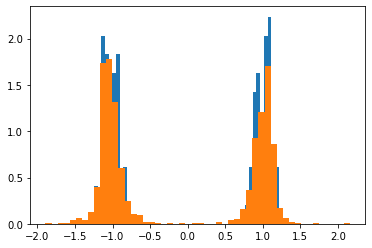

In [18]:
mdl.eval()
x_smp = mdl.rsample(1000)
plt.hist(x_dat.squeeze().tolist(), bins=50, density=True);
plt.hist(x_smp.squeeze().tolist(), bins=50, density=True);

## Learn from Energy

In [19]:
mdl = RGModel([1], 1, hdims=[16, 8], hyper_dim=16)
opt = torch.optim.Adam(mdl.parameters(), lr=0.01)

In [20]:
def energy(x):
    return torch.squeeze((x-1)**2/(2*(1/3)**2))

In [28]:
mdl.train()
opt.param_groups[0]['lr'] = 0.001
for _ in range(10):
    opt.zero_grad()
    out = mdl.free_loss(energy, 1000, lk=0.01, lg=0.01, atol=1e-3, rtol=1e-3)
    loss = out[0]
    loss.backward()
    opt.step()
    print(*[f'{o.item():5.2f}' for o in out])

 1.63  1.60  1.54  1.49
 1.73  1.70  1.53  1.57
 1.67  1.64  1.54  1.47
 1.63  1.60  1.56  1.29
 1.73  1.70  1.54  1.34
 1.66  1.63  1.50  1.33
 1.64  1.62  1.40  1.25
 1.68  1.65  1.44  1.24
 1.65  1.62  1.48  1.24
 1.59  1.56  1.41  1.23


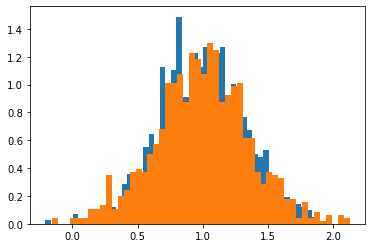

In [29]:
mdl.eval()
x_smp = mdl.rsample(1000)
x_dat = torch.randn_like(x_smp)/3+1
plt.hist(x_dat.squeeze().tolist(), bins=50, density=True);
plt.hist(x_smp.squeeze().tolist(), bins=50, density=True);